In [1]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import optimization
%load_ext autoreload
%autoreload 2

In [2]:
data = np.loadtxt("../data/values_1d.csv", delimiter=",", skiprows=1)[:,1]
data2 = tifffile.imread("../data/UD756_WT_3.tif")

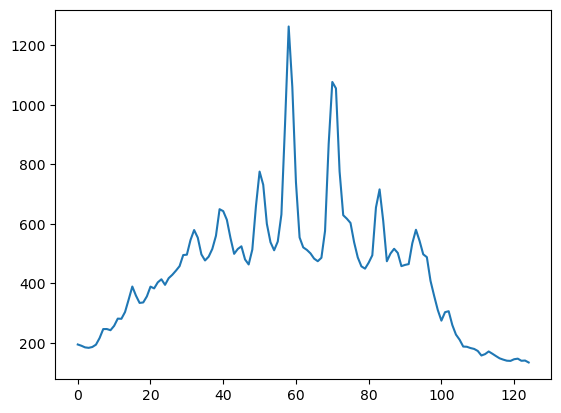

In [3]:
plt.plot(data)

In [29]:
sol, stats = optimization.estimate_background(
    data, max_iter=1000, reltol=1e-3, lam=100., rho=80.0
    )

ndim =  1
 iter : 28, |r| = 2.8849e-03, |s| = 2.9278e-01, |dx| = 9.5103e-04


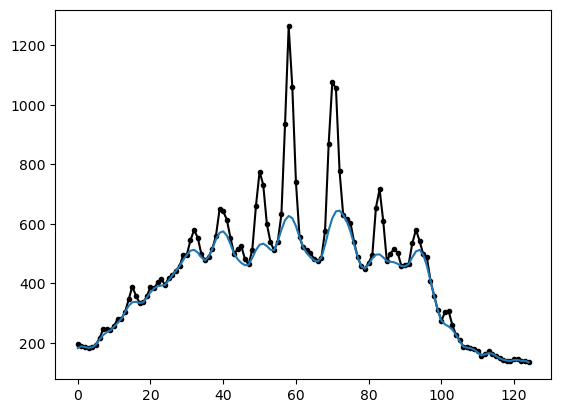

In [30]:
plt.plot(data, 'k.-')
plt.plot(sol)

In [34]:
data2 = tifffile.imread("../data/UD756_WT_3_denoised.tif")

In [43]:
sol2, stats2 = optimization.estimate_background(
    data2, max_iter=1000, reltol=1e-3, lam=500., rho=450.0
    ) 

 iter : 34, |r| = 9.8060e-02, |s| = 7.9139e+01, |dx| = 9.6153e-04


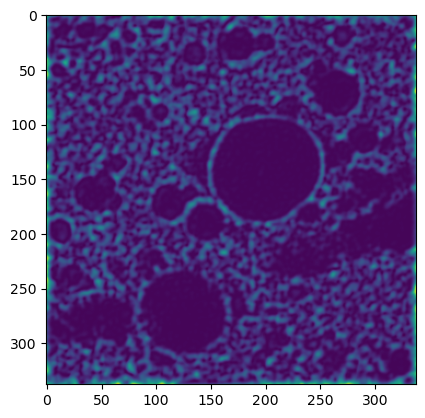

In [45]:
plt.imshow(data2 - sol2)

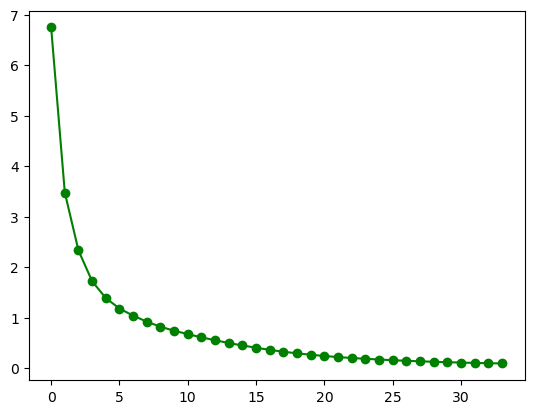

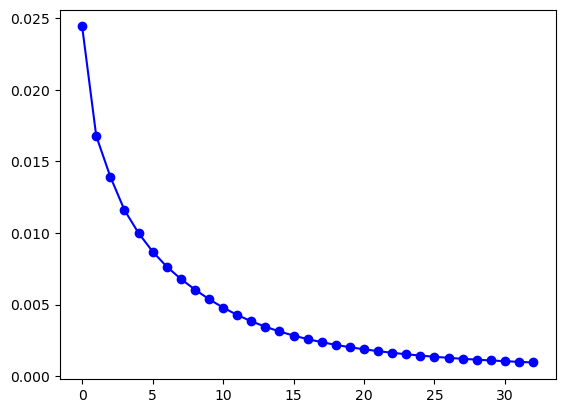

In [49]:
plt.figure()
plt.plot(stats2["primal"], 'go-')
plt.figure()
plt.plot(stats2["dx"][1:], "bo-")

In [54]:
import napari
viewer = napari.Viewer()

In [51]:
data3 = tifffile.imread("../data/HeLa_dots_crop_128x128.tif")

In [52]:
sol3, stats3 = optimization.estimate_background(
    data3, max_iter=1000, reltol=1e-3, lam=500., rho=450.0
)

 iter : 406, |r| = 1.3184e-02, |s| = 5.1816e+01, |dx| = 9.9975e-04


In [55]:
viewer.add_image(sol3, name="background")

<Image layer 'background' at 0x303076320>

In [56]:
viewer.add_image(data3, name="raw data")

<Image layer 'raw data' at 0x2fb8465f0>

In [57]:
viewer.add_image(data3 - sol3, name="net")

<Image layer 'net' at 0x3150aa320>